In [14]:
%load_ext autoreload
%autoreload 2

import librosa
import matplotlib.pyplot as plt
import numpy as np
import helpers
import IPython.display as ipd
from numpy.linalg import norm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Scale transform magnitude's stability to tempo variation
Assess the extent to which the feature remains invariant despite tempo transformations applied to the signal.

The scaled version consists of the original signal, which has been sped up by 15% using Audacity.


In [15]:
# path to audio file
audio_file = "clip-MJ_Maraka_1_J1.wav"
# the scaled up version has been obtained using audacity to change the tempo of 15%
audio_file_scaled = "clip-MJ_Maraka_1_J1-scaled-up.wav"

y, sr = librosa.load(audio_file, sr=8000)
y_scaled, sr = librosa.load(audio_file_scaled, sr=8000)

ipd.display(ipd.Audio(y, rate=sr))
ipd.display(ipd.Audio(y_scaled, rate=sr))

We expect a high similarity score as the STM is supposed to capture rythmic aspects regardless of the tempo variations.

Cosine Similarity: 0.99850187304296
Euclidean Distance: 0.0781783027023065


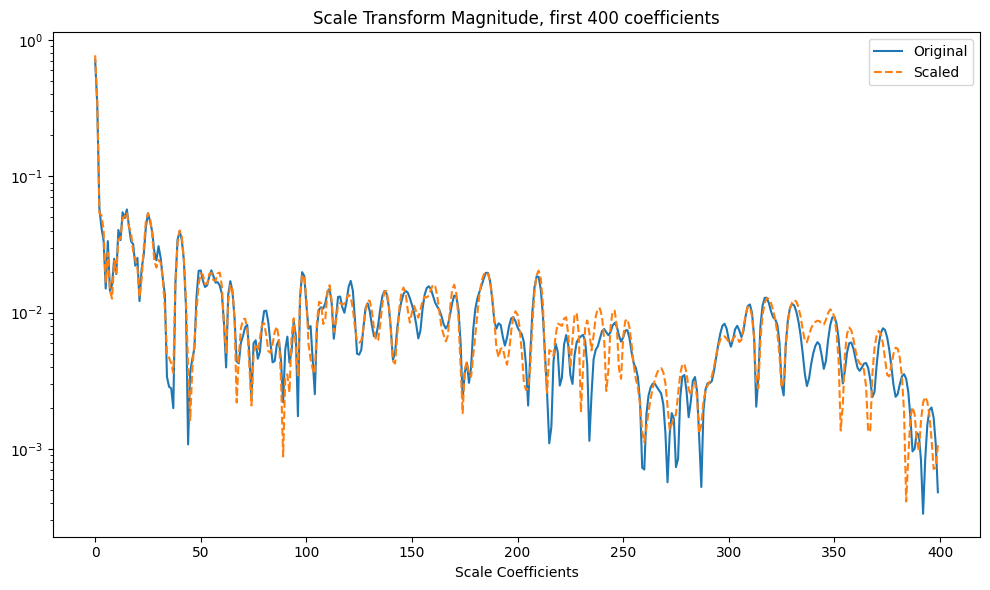

In [21]:
num_stm_coefs = 400
stm = helpers.compute_stm(y=y, sr=sr)[:num_stm_coefs]
stm_scaled = helpers.compute_stm(y=y_scaled, sr=sr)[:num_stm_coefs]

fig, ax = plt.subplots( figsize=(10, 6))
ax.semilogy(np.abs(stm), label="Original")
ax.semilogy(np.abs(stm_scaled), label="Scaled", linestyle="--")
ax.set(xlabel="Scale Coefficients", title=f"Scale Transform Magnitude, first {num_stm_coefs} coefficients")
ax.legend()
plt.tight_layout()

# compute cosine similarity
cosine_sim = np.dot(np.abs(stm), np.abs(stm_scaled)) / (norm(np.abs(stm)) * norm(np.abs(stm_scaled)))
print("Cosine Similarity:", cosine_sim)

# Compute Euclidean distance
euclidean_dist = np.linalg.norm(np.abs(stm) - np.abs(stm_scaled))
print("Euclidean Distance:", euclidean_dist)

### Scale transform magnitude's stability to timbre variation

In [20]:
# loading file at the original sample rate before applying pitch shifting
y, sr = librosa.load(audio_file, sr=None)
y_scaled = librosa.effects.pitch_shift(y, sr=sr, n_steps=12)

ipd.display(ipd.Audio(y, rate=sr))
ipd.display(ipd.Audio(y_scaled, rate=sr))

Cosine Similarity: 0.9991361980365466
Euclidean Distance: 0.12589819121887288


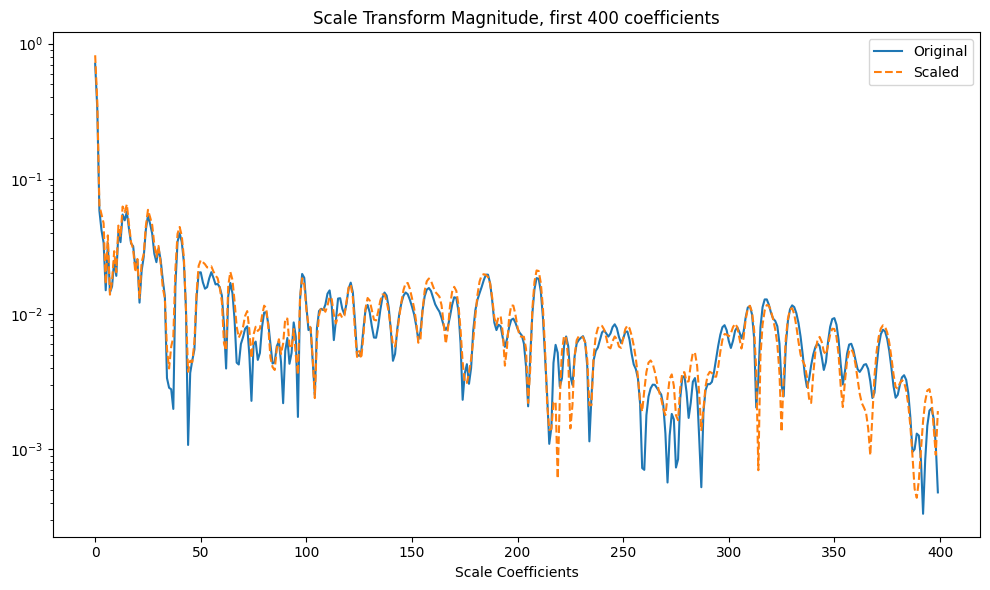

In [23]:
num_stm_coefs = 400
stm = helpers.compute_stm(y=y, sr=sr)[:num_stm_coefs]
stm_scaled = helpers.compute_stm(y=y_scaled, sr=sr)[:num_stm_coefs]

fig, ax = plt.subplots( figsize=(10, 6))
ax.semilogy(np.abs(stm), label="Original")
ax.semilogy(np.abs(stm_scaled), label="Scaled", linestyle="--")
ax.set(xlabel="Scale Coefficients", title=f"Scale Transform Magnitude, first {num_stm_coefs} coefficients")
ax.legend()
plt.tight_layout()

# compute cosine similarity
cosine_sim = np.dot(np.abs(stm), np.abs(stm_scaled)) / (norm(np.abs(stm)) * norm(np.abs(stm_scaled)))
print("Cosine Similarity:", cosine_sim)

# Compute Euclidean distance
euclidean_dist = np.linalg.norm(np.abs(stm) - np.abs(stm_scaled))
print("Euclidean Distance:", euclidean_dist)